In [5]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../code/")

In [6]:
import pickle
H_au = pickle.load(open('../predictions/case-2-graph_Austin_True_1_13_Hs.pkl', 'r'))


In [7]:
H_sd = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0.pkl', 'r'))
H_error_home = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error_home.pkl', 'r'))
H_error = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error.pkl', 'r'))
H_params = pickle.load(open('../predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_params.pkl', 'r'))

In [8]:
H_params[325]

[2, 1300, 2, 3, 0.001]

In [9]:
best_show = [
            [2, 1300, 2,3,0.001],
            #[2, 700, 2, 3, 0.001]
]

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [11]:
from plot_functions import latexify, format_axes

[0.1, 1300, 2, 3, 0]
9.64394298538
~/git/task3/demo_2_1300_2_3_0.001.png


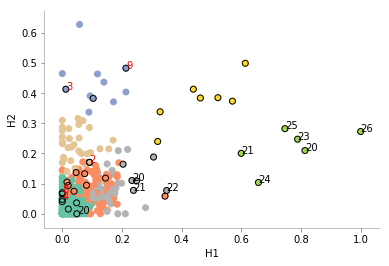

In [13]:
# latexify()
for i in range(len(best_show)):
# for i in range(1):
    lr, iters, season, home, lam = best_show[i]
    print H_params[i]
    
    H_sandiego = H_sd[lr][iters][season][home][lam]
    H_austin = H_au[lr][season][home][lam][iters]
    
    H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
    H_sandiego = H_sandiego.values
    
    X = np.r_[H_austin, H_sandiego]
    print np.max(X)
    X = X/np.max(X)
    y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
    x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
    
    y_sd = np.zeros(len(H_sandiego))
    y_au = np.ones(len(H_austin))
    y_label = np.r_[y_au, y_sd]
    
    home_error = H_error_home[lr][iters][season][home][lam]
    home_error = np.around(home_error.values)    
    
    
    start = len(H_austin)
    d = np.random.randint(0, 2, size=(3,3,3))
    z,x,y = d.nonzero()
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111)
#     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
    ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
    ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
#     ax.set_color('yellow', 'red')
    # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
    
    max_idx = (-home_error).argsort()[:10]
    min_idx = (home_error).argsort()[:5]
    
    for i in max_idx:
        ax.annotate(int(home_error[i]), (X[i+start, x1],X[i+start, x2]))
    for i in min_idx:
        ax.annotate(int(home_error[i]), (X[i+start, x1],X[i+start, x2]), color='red')
        
    print "~/git/task3/demo_{}_{}_{}_{}_{}.png".format(lr, iters, season, home, lam)

    #plt.savefig("../results/Home_factors_{}_{}_{}_{}_{}.png".format(lr, iters, season, home, lam))
format_axes(ax)
ax.set_xlabel("H1")
ax.set_ylabel("H2")

In [18]:
def get_tensor_appliance(df, dfc, appliance):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] ]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 1, stop - start))
    M, N, O = tensor.shape
    return tensor

In [22]:
from common import compute_rmse_fraction, contri, get_tensor, create_region_df_dfc_static
from degree_days import dds
source = 'Austin'
target = 'SanDiego'
year = 2014
region = "Austin"
start = 1
stop = 13
source_df, source_dfc, source_tensor, source_static = create_region_df_dfc_static(source, year, start, stop)
target_df, target_dfc, target_tensor, target_static = create_region_df_dfc_static(target, year, start, stop)
source_agg = get_tensor_appliance(source_df, source_dfc, 'aggregate')
target_agg = get_tensor_appliance(target_df, target_dfc, 'aggregate')


In [108]:
target_agg

array([[[           nan,            nan,   220.70167542,   272.93026733,
           309.73760986,   319.73226929,   436.1390686 ,   446.90045166,
                    nan,            nan,            nan,            nan]],

       [[           nan,            nan,            nan,            nan,
                    nan,   437.13427734,   684.90673828,   581.93005371,
           447.47021484,   241.61793518,   205.79020691,   290.33340454]],

       [[           nan,            nan,            nan,            nan,
                    nan,            nan,            nan,  1157.16113281,
          1250.08679199,            nan,            nan,            nan]],

       [[  429.81958008,   438.57168579,   403.08969116,   459.38369751,
           861.30993652,  1008.58929443,   917.4286499 ,  1176.81640625,
          1098.12512207,   906.03173828,   593.63232422,   801.44415283]],

       [[           nan,            nan,            nan,            nan,
                    nan,            nan

In [109]:
source = source_agg[:, 0, :]
target = target_agg[:, 0, :]
X = np.r_[source, target]
# print target
# X = X/np.max(X)
# y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
# x1, x2 = (-np.var(X, axis=0)).argsort()[:2]

In [110]:
home_error = H_error_home[lr][iters][season][home][lam]
home_error = np.around(home_error.values)    
k = np.r_[np.zeros(len(source)), home_error].reshape(-1, 1)
X = np.c_[X, k]
X = pd.DataFrame(X).dropna(how='any')

In [111]:
X = X.as_matrix()
X[:, :12] = X[:, :12]/np.max(X[:, :12])



In [112]:
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X[:, :12])
x1, x2 = (-np.var(X[:, :12], axis=0)).argsort()[3:5]
y_pred

array([1, 3, 3, 2, 0, 1, 3, 1, 0, 2, 1, 2, 4, 1, 3, 4, 3, 1, 0, 3, 1, 3, 0,
       4, 1, 3, 1, 0, 1, 0, 0, 4, 0, 1, 4, 1, 1, 0, 4, 1, 2, 4, 0, 3, 3, 4,
       1, 1, 1, 2, 0, 3, 0, 3, 0, 0, 4, 0, 2, 4, 3, 3, 3, 3, 1, 3, 2, 4, 0,
       0, 3, 3, 3, 4, 0, 4, 3, 3, 0, 4, 3, 0, 3, 4, 1, 2, 0, 0, 2, 4, 0, 4,
       1, 1, 2, 0, 4, 1, 4, 4, 0, 0, 0, 3, 2, 0, 3, 4, 0, 3, 4, 0, 4, 3, 2,
       4, 3, 2, 3, 3, 3, 4, 2, 3, 0, 4, 4, 3, 0, 2, 0, 4, 3, 4, 4, 3, 4, 2,
       3, 2, 1, 4, 0, 4, 3, 0, 4, 3, 4, 1, 4, 0, 3, 2, 4, 3, 3, 0, 0, 4, 3,
       0, 3, 3, 0, 0, 3, 3, 4, 0, 3, 4, 3, 3, 4, 0, 1, 4, 0, 4, 3, 4, 3, 3,
       0, 1, 0, 0, 1, 3, 1, 1, 1, 4, 0, 1, 0, 4, 3, 4, 1, 3, 3, 3, 1, 1, 3,
       3, 4, 0, 1, 1, 0, 2, 2, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 2, 0,
       3, 1, 1, 4, 3, 0, 0, 4, 2, 4, 4, 1, 0, 0, 0, 4, 4, 1, 2, 1, 0, 1, 4,
       4, 2, 0, 1, 1, 3, 3, 0, 4, 0, 4, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1], dtype=int32)

In [113]:
start = 262

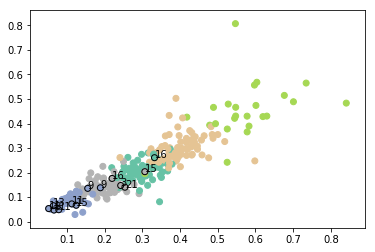

In [115]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
#     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
for i in range(start, len(X)):
    ax.annotate(int(X[i, 12]), (X[i, x1],X[i, x2]))

/home/yj9xs/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


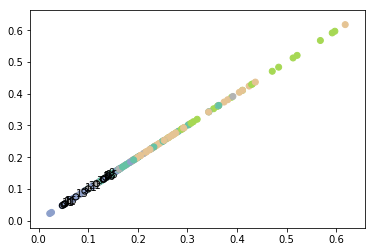

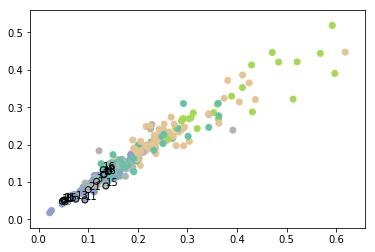

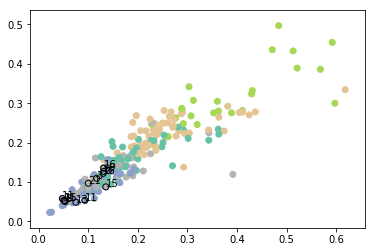

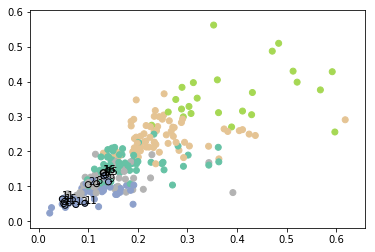

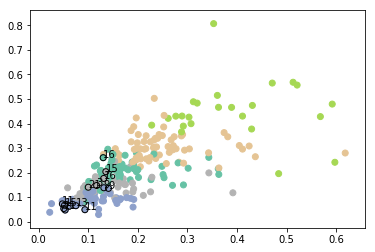

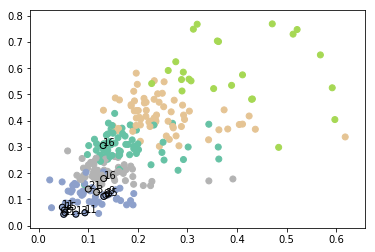

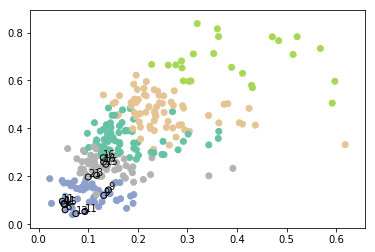

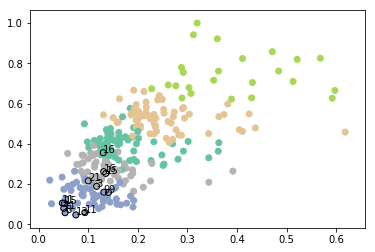

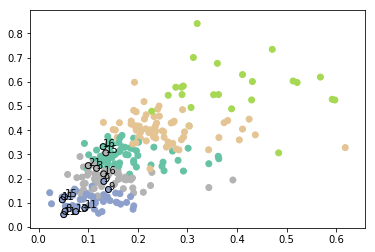

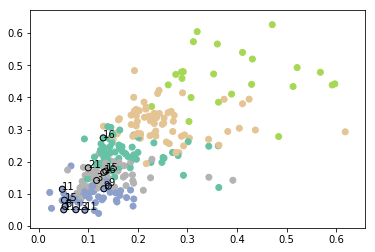

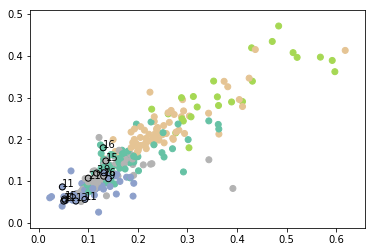

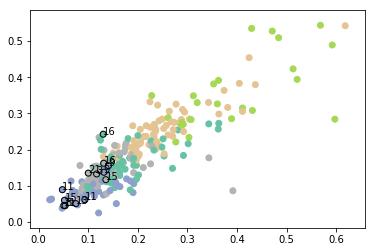

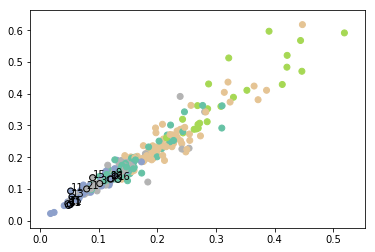

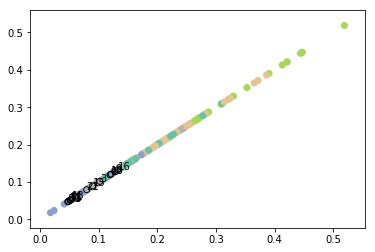

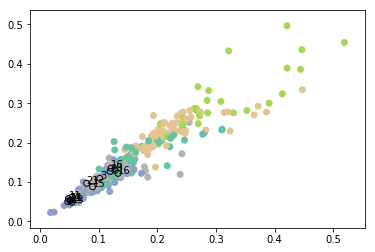

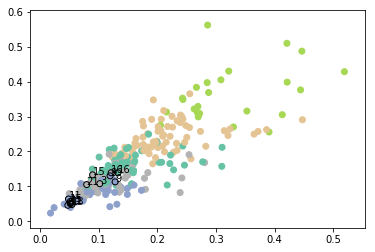

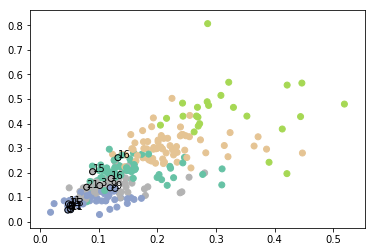

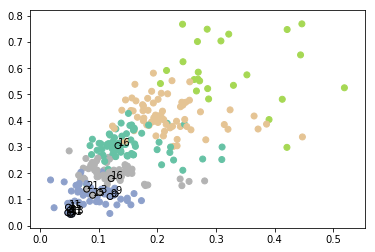

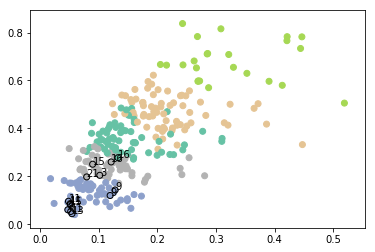

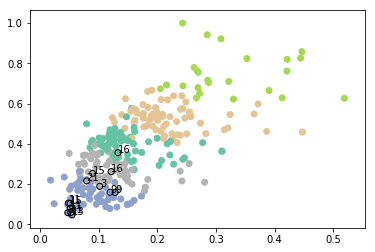

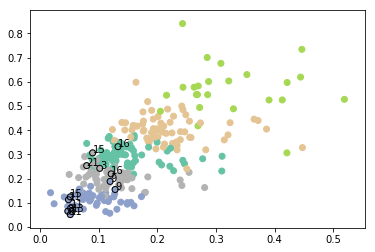

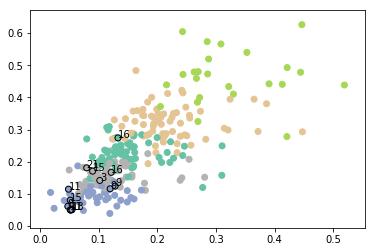

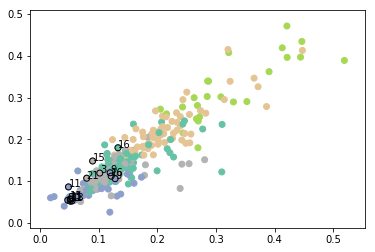

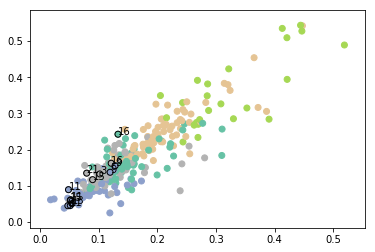

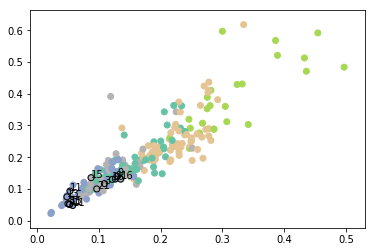

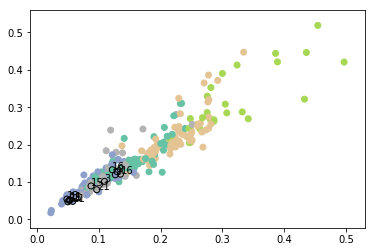

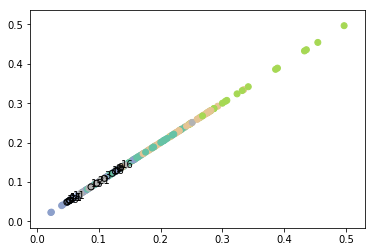

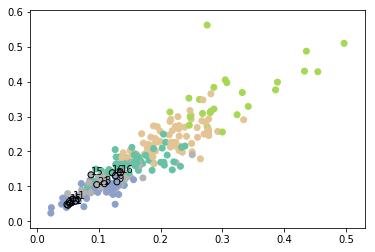

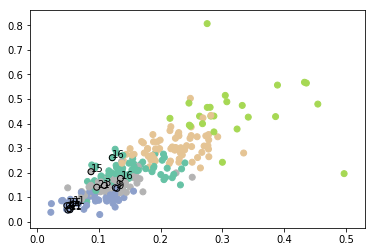

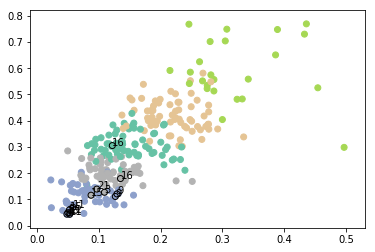

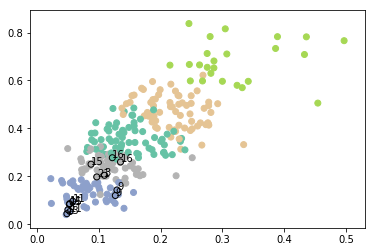

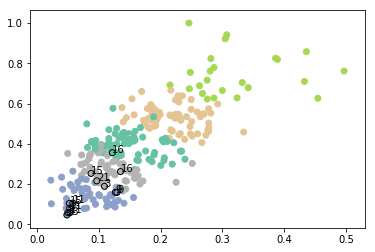

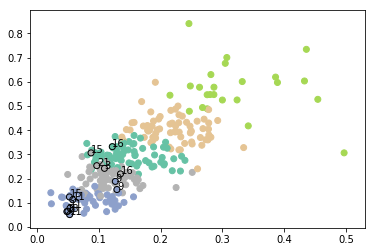

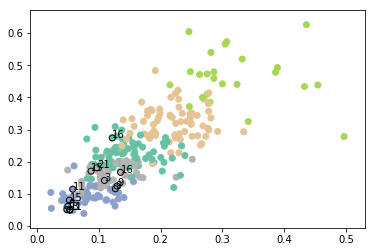

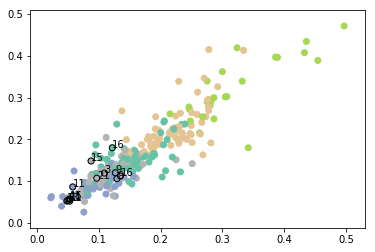

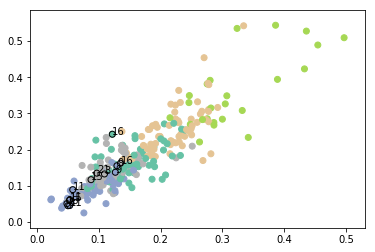

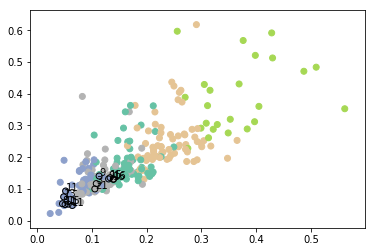

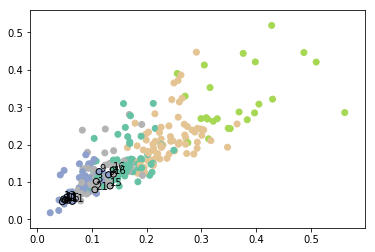

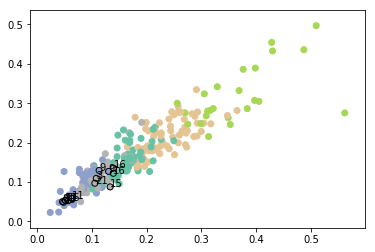

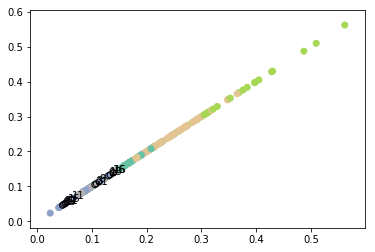

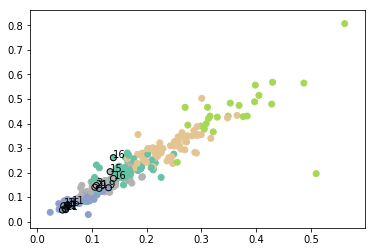

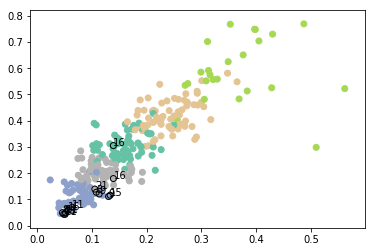

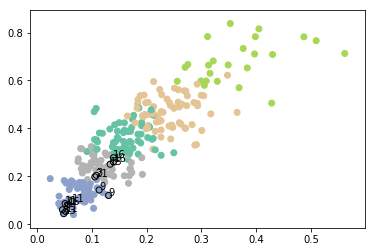

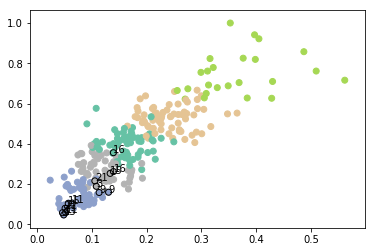

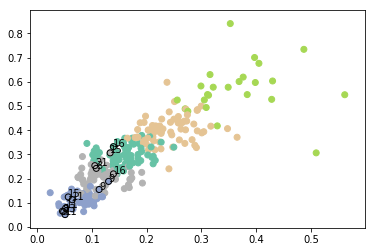

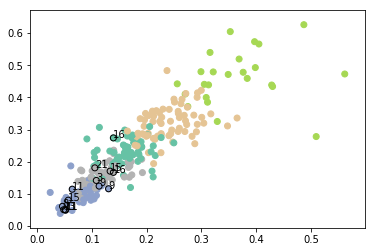

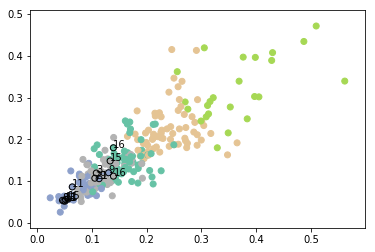

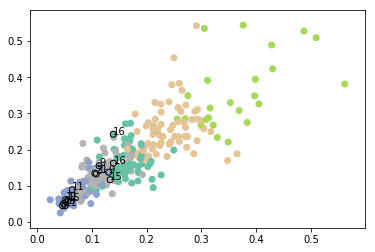

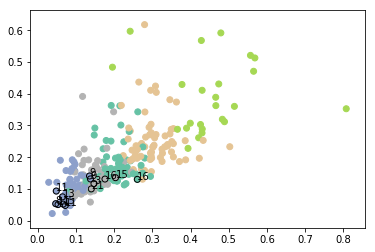

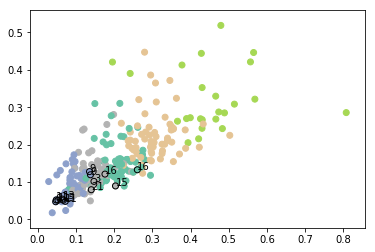

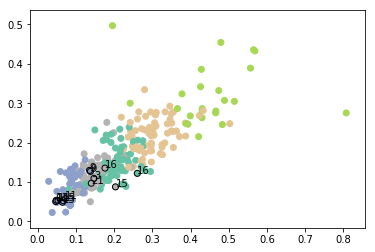

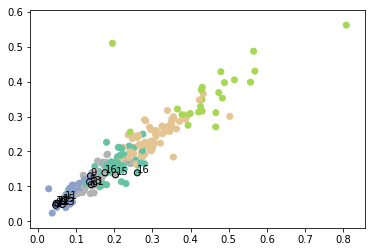

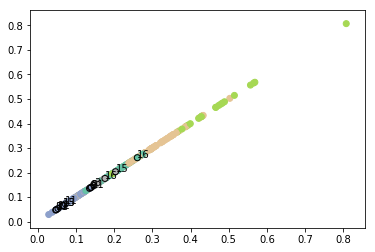

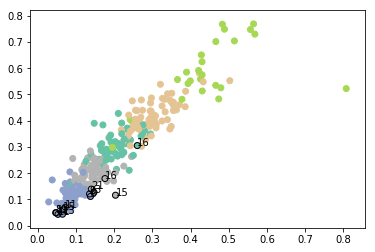

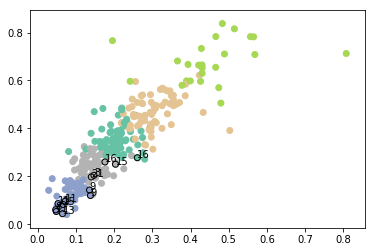

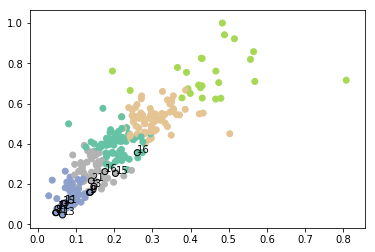

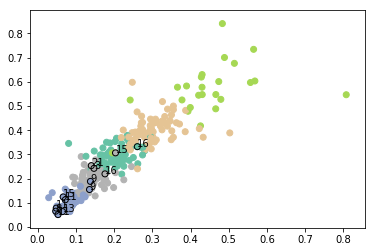

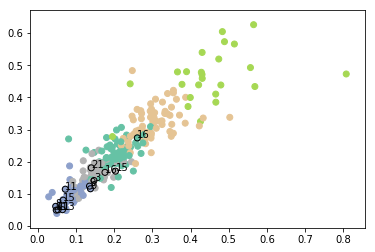

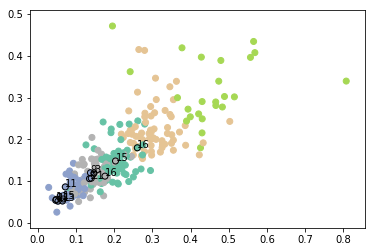

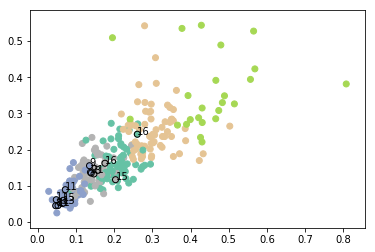

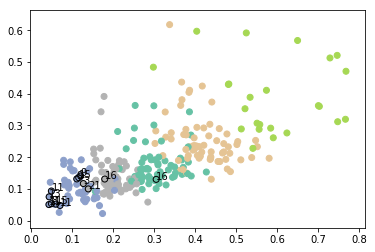

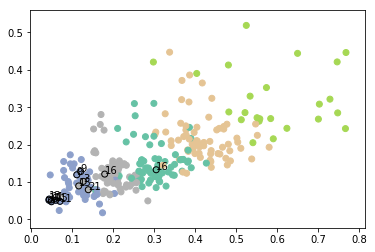

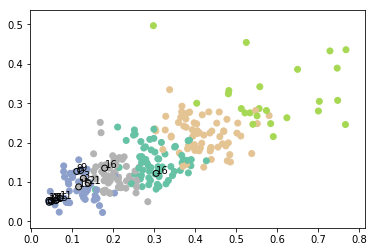

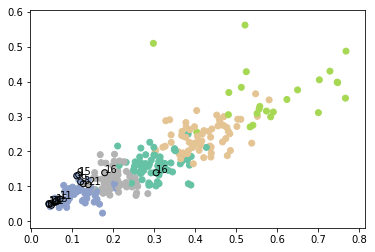

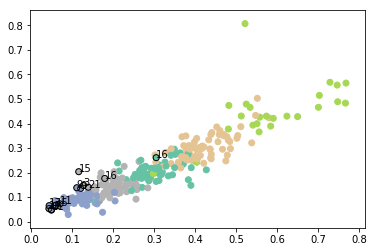

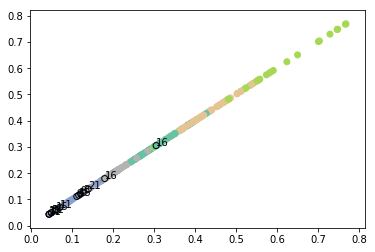

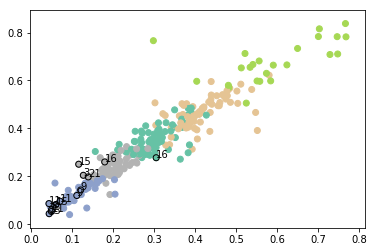

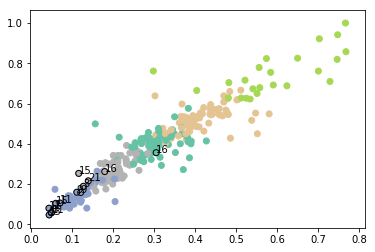

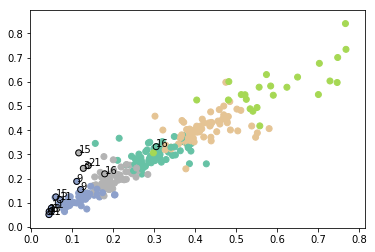

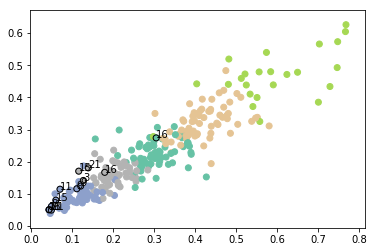

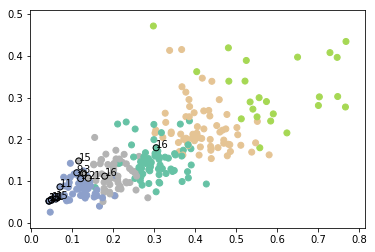

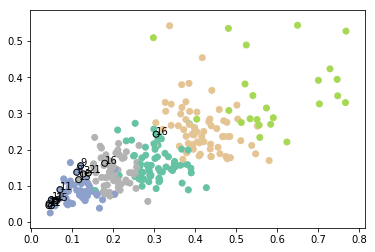

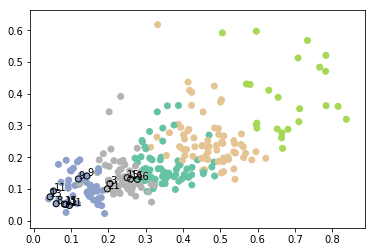

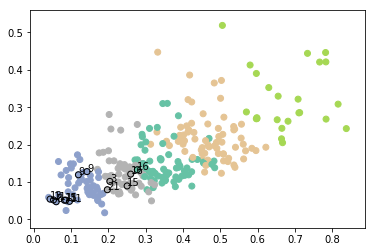

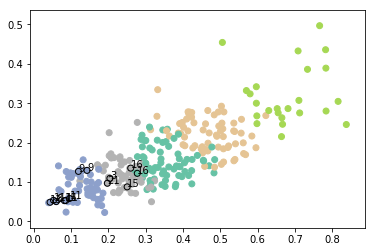

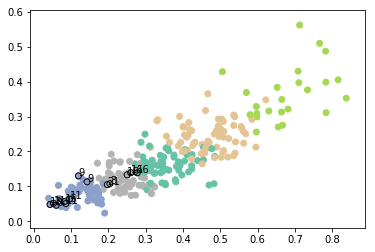

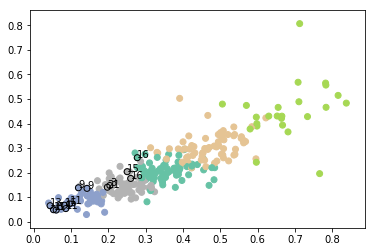

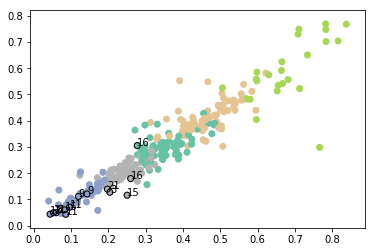

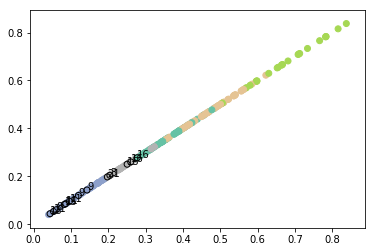

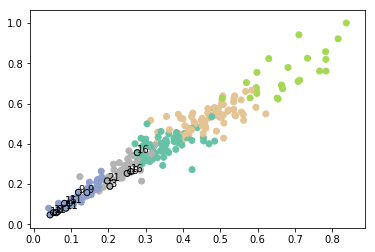

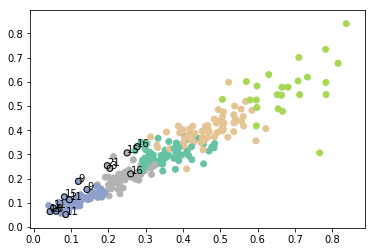

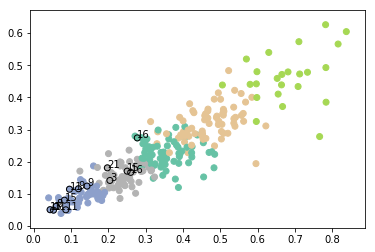

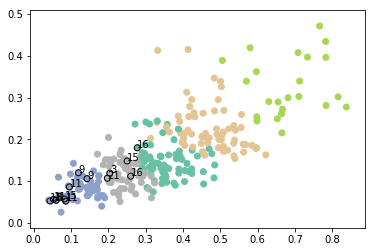

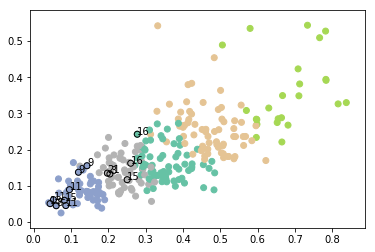

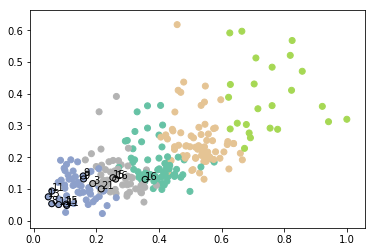

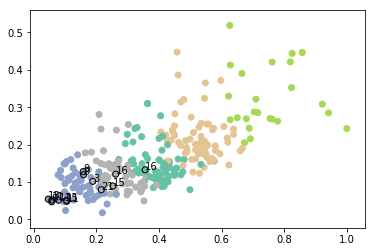

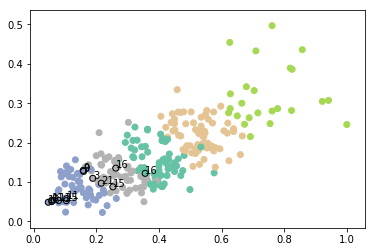

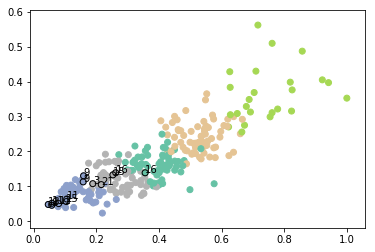

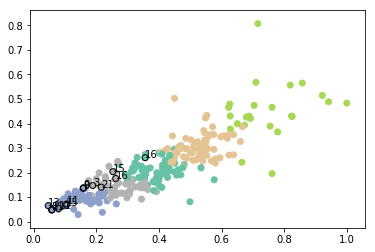

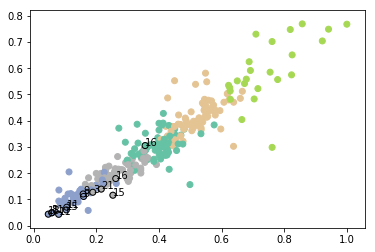

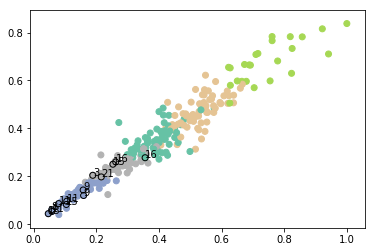

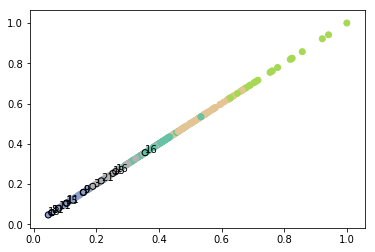

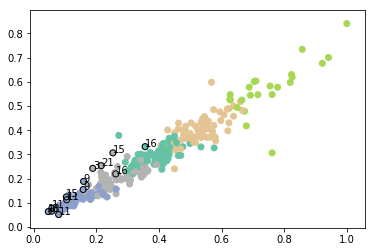

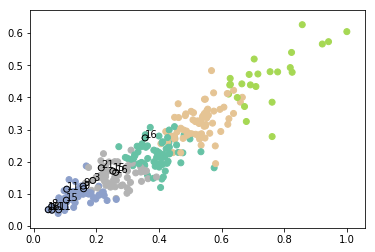

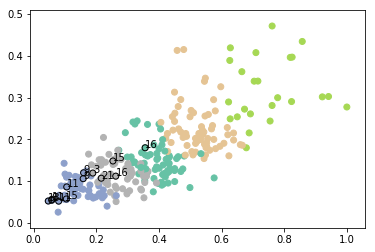

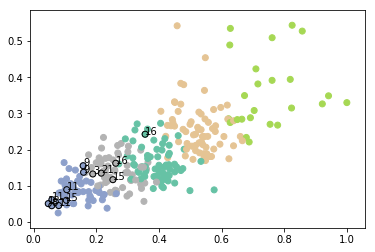

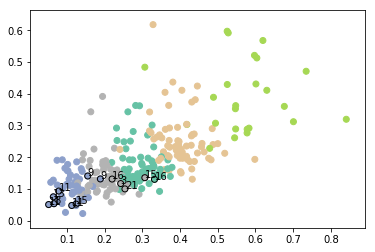

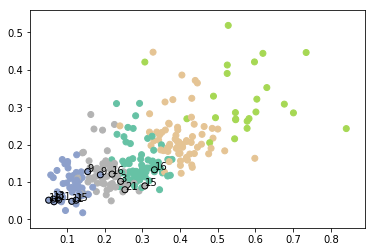

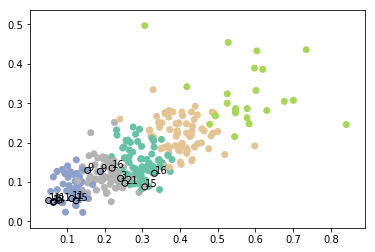

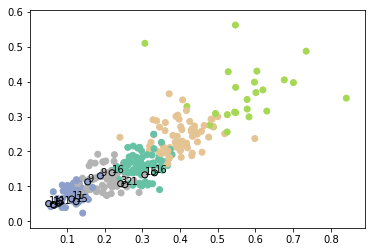

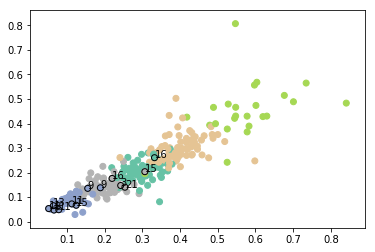

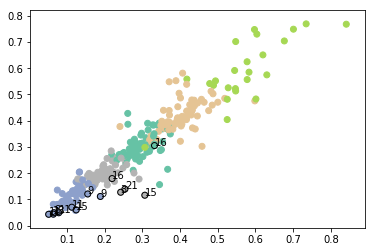

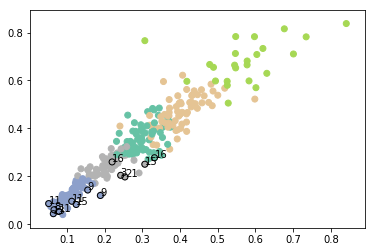

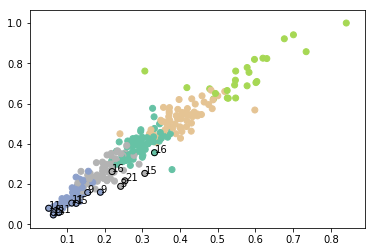

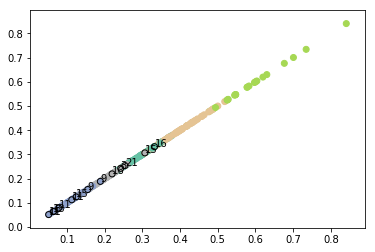

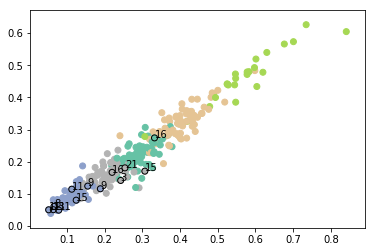

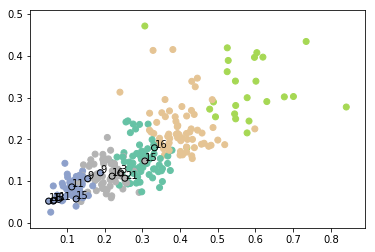

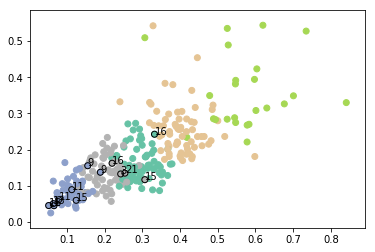

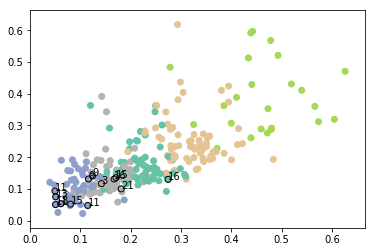

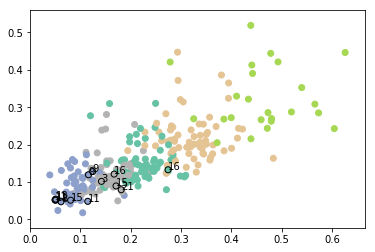

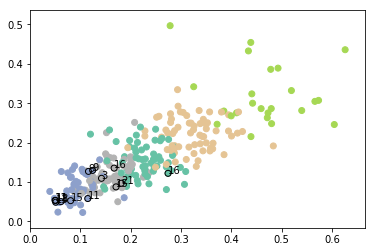

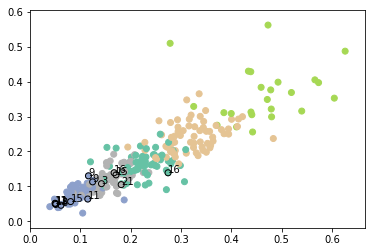

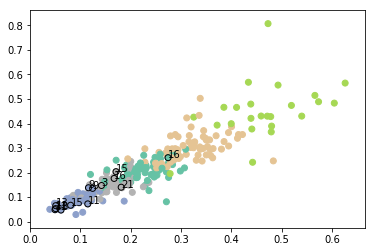

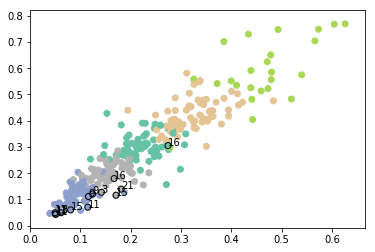

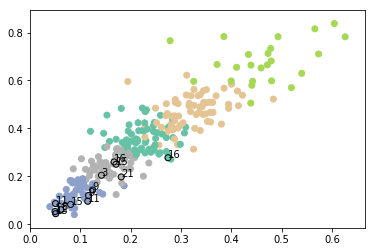

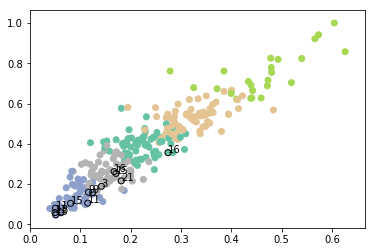

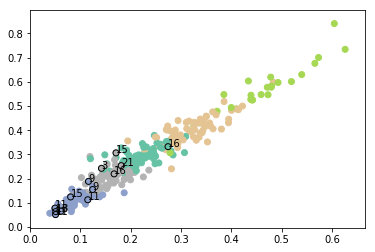

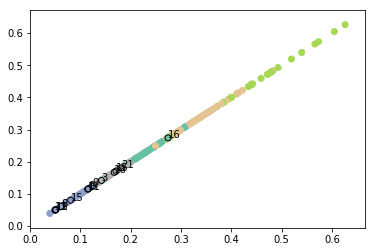

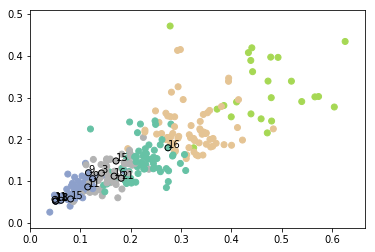

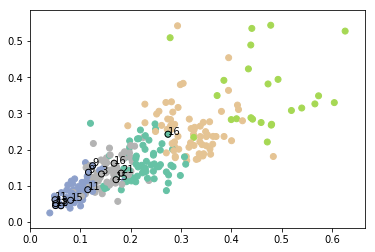

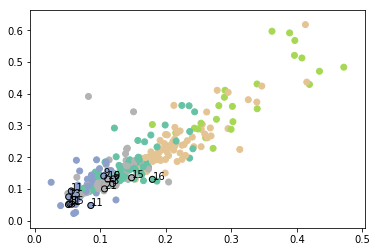

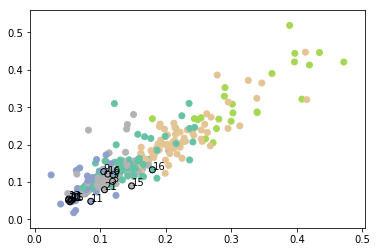

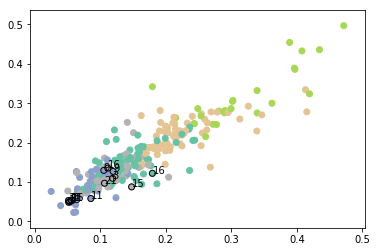

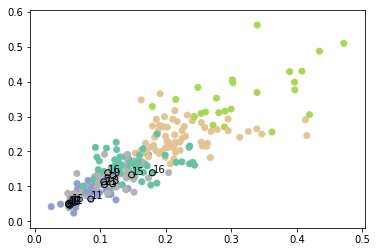

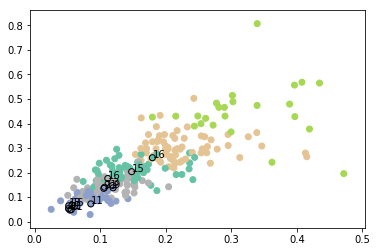

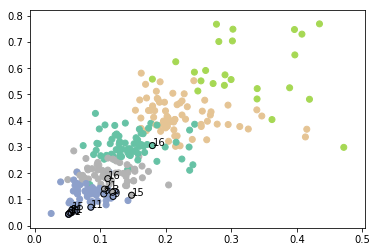

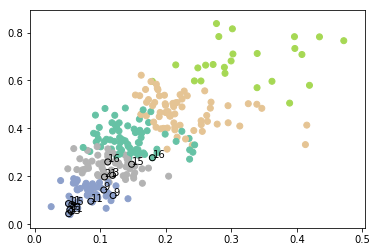

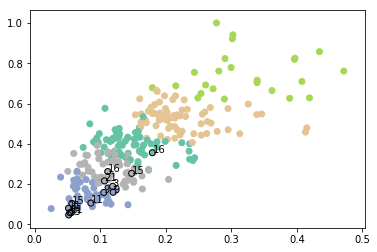

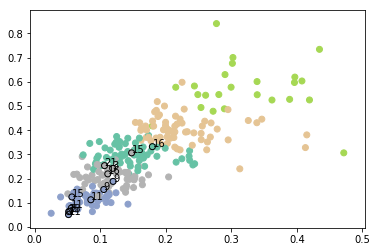

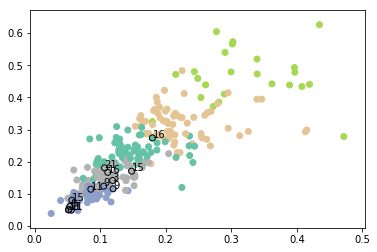

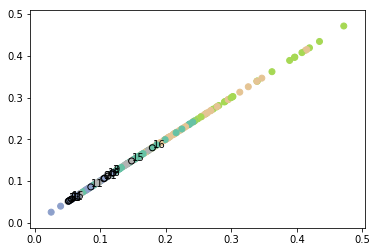

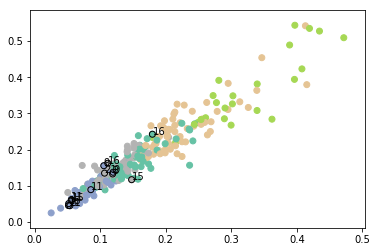

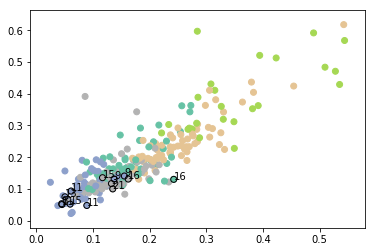

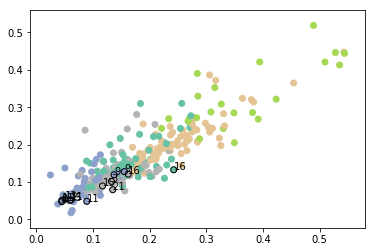

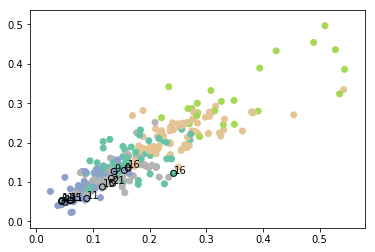

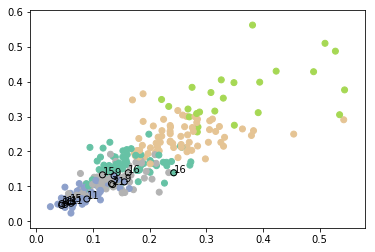

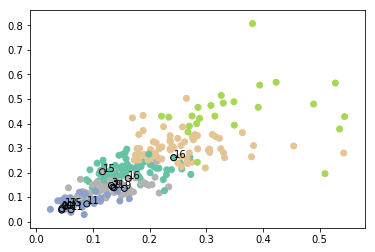

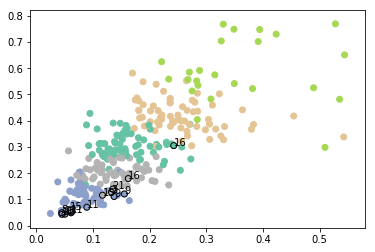

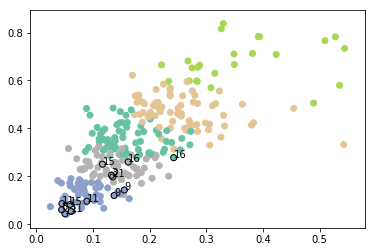

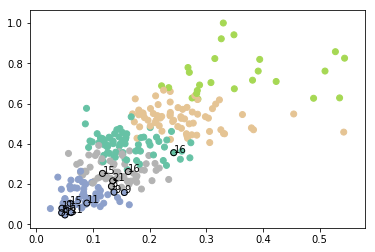

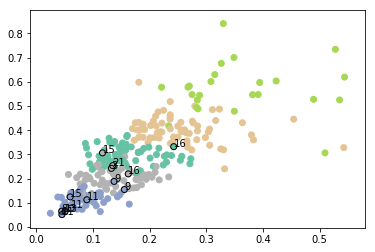

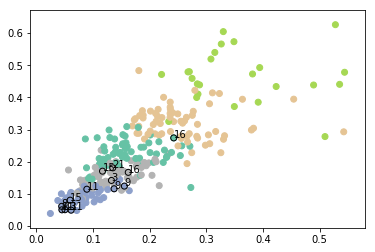

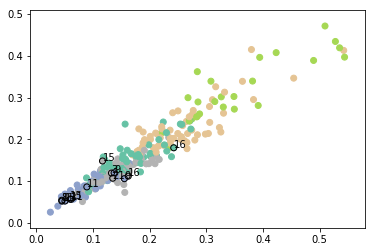

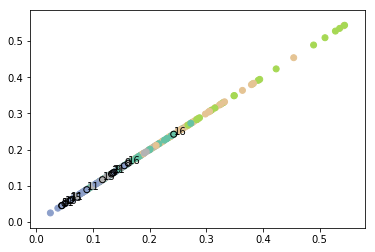

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for x1 in range(12):
    for x2 in range(12):
        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111)
        #     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
        ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
        ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
        for i in range(start, len(X)):
            ax.annotate(int(X[i, 12]), (X[i, x1],X[i, x2]))

[0.1, 1300, 2, 3, 0]
9.64394298538
~/git/task3/demo_2_1300_2_3_0.001.png


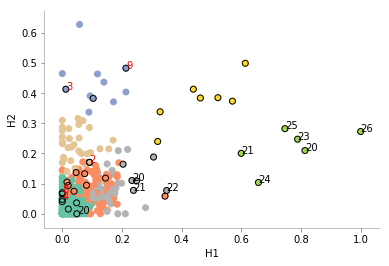

In [105]:
# latexify()
for i in range(len(best_show)):
# for i in range(1):
    lr, iters, season, home, lam = best_show[i]
    print H_params[i]
    
    H_sandiego = H_sd[lr][iters][season][home][lam]
    H_austin = H_au[lr][season][home][lam][iters]
    
    H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
    H_sandiego = H_sandiego.values
    
    X = np.r_[H_austin, H_sandiego]
    print np.max(X)
    X = X/np.max(X)
    y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
    x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
    
    y_sd = np.zeros(len(H_sandiego))
    y_au = np.ones(len(H_austin))
    y_label = np.r_[y_au, y_sd]
    
    home_error = H_error_home[lr][iters][season][home][lam]
    home_error = np.around(home_error.values)    
    
    
    start = len(H_austin)
    d = np.random.randint(0, 2, size=(3,3,3))
    z,x,y = d.nonzero()
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111)
#     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
    ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
    ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
#     ax.set_color('yellow', 'red')
    # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
    
    max_idx = (-home_error).argsort()[:10]
    min_idx = (home_error).argsort()[:5]
    
    for i in max_idx:
        ax.annotate(int(home_error[i]), (X[i+start, x1],X[i+start, x2]))
    for i in min_idx:
        ax.annotate(int(home_error[i]), (X[i+start, x1],X[i+start, x2]), color='red')
        
    print "~/git/task3/demo_{}_{}_{}_{}_{}.png".format(lr, iters, season, home, lam)

    #plt.savefig("../results/Home_factors_{}_{}_{}_{}_{}.png".format(lr, iters, season, home, lam))
format_axes(ax)
ax.set_xlabel("H1")
ax.set_ylabel("H2")

In [210]:
(-np.var(X, axis=0)).argsort()[:2]

array([3, 4])

In [205]:
X

array([[ 0.01635801,  0.0517815 ,  0.03943585,  0.01259887,  0.03302816],
       [ 0.07921914,  0.07894605,  0.07840301,  0.07925766,  0.07939159],
       [ 0.02948893,  0.03248081,  0.02282549,  0.0217706 ,  0.03641466],
       ..., 
       [ 0.05789175,  0.12478885,  0.07216465,  0.01096588,  0.15634926],
       [ 0.05540949,  0.05265663,  0.08815022,  0.10616215,  0.02584823],
       [ 0.01143033,  0.01786658,  0.09138949,  0.0909926 ,  0.0115726 ]])

In [28]:
np.argmin(H_sd['Error'])

1

In [107]:
y_pred = KMeans(n_clusters=5, random_state=0).fit_predict(X)

In [31]:
lr, iters, home, season, lam = H_sd['Learning Params'][1]

In [114]:
H_sd['Learning Params'][1]

[0.1, 1300, 2, 3, 0.001]

In [57]:
H_sandiego = H_sd['H'][lr][iters][home][season][lam]
H_austin = H_au[lr][home][season][lam][iters]
H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
H_sandiego = H_sandiego.values

In [105]:
X = np.r_[H_austin, H_sandiego]

In [106]:
X

array([[ 1.44978439,  1.85235149,  2.24196778],
       [ 5.07829371,  5.19002611,  5.31706703],
       [ 1.25873953,  1.91841413,  2.01917777],
       ..., 
       [ 3.91653929,  4.54876306,  4.20064527],
       [ 3.54303754,  2.33810825,  4.02175073],
       [ 1.79951822,  0.7918247 ,  3.57216809]])

In [108]:
y_sd = np.zeros(39)
y_au = np.ones(len(H_austin))

In [110]:
y_label = np.r_[y_au, y_sd]

In [146]:
result = pickle.load(open(os.path.expanduser('./result.pkl'), 'r'))
result = np.around(result.values)

In [147]:
result

array([ 17.,  20.,  28.,  18.,  26.,  17.,  15.,  16.,  22.,  19.,  25.,
        12.,  17.,  20.,  18.,   8.,  12.,  18.,   5.,  11.,   2.,  12.,
        22.,  17.,  15.,   4.,  22.,  24.,  15.,  24.,  14.,  11.,  17.,
        17.,  27.,  22.,  28.,  11.,  14.])

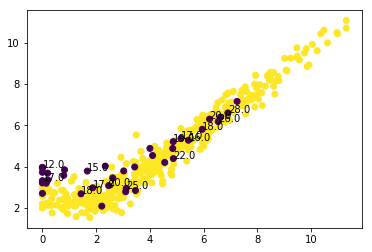

In [156]:

start = len(H_austin)
d = np.random.randint(0, 2, size=(3,3,3))
z,x,y = d.nonzero()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)
ax.scatter(X[:, 1], X[:, 2], c= y_label)
# ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)

for i in range(start, start + 15):
    ax.annotate(result[i-start], (X[i, 1],X[i, 2]))

plt.savefig("demo.png")